Do lighting conditions (time of day) have an effect on accidents and severity? (daylight vs darkness)
    light conditions vs. total accidents
    light conditions vs. severity

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read cleaned dataset csv file for accidents.
accidents = pd.read_csv('../../CleanedAccidents0515.csv', error_bad_lines=False)
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [4]:
# Pull out columns into new dataframe to analyze for Accident ID, Time of day, Light Conditions, and Accident Severity
light_acc = accidents[['Accident_Index', 'Time','Light_Conditions','Accident_Severity']]
light_acc.head(10)

# df1 = df[['a','b']]
# light_acc.to_csv(path_or_buf='LightConditions.csv', encoding='utf-8', index=False)

,Accident_Index,Time,Light_Conditions,Accident_Severity
0,200501BS00001,17:42,1,2
1,200501BS00002,17:36,4,3
2,200501BS00003,00:15,4,3
3,200501BS00004,10:35,1,3
4,200501BS00005,21:13,7,3
5,200501BS00006,12:40,1,3
6,200501BS00007,20:40,4,3
7,200501BS00009,17:35,1,3
8,200501BS00010,22:43,4,3
9,200501BS00011,16:00,1,3


In [5]:
# Now merge the light conditions context to the dataframe.
context_light_cond = pd.read_csv("../contextCSVs/Light_Conditions.csv")
light_merge = pd.merge(light_acc, context_light_cond, how="left", left_on="Light_Conditions", right_on="code")

Light_Merge = light_merge.rename(index=str, columns={"Light_Conditions":"light_code","label": "Light_Conditions"})
Light_Merge.head()

,Accident_Index,Time,light_code,Accident_Severity,code,Light_Conditions
0,200501BS00001,17:42,1,2,1,Daylight
1,200501BS00002,17:36,4,3,4,Darkness - lights lit
2,200501BS00003,00:15,4,3,4,Darkness - lights lit
3,200501BS00004,10:35,1,3,1,Daylight
4,200501BS00005,21:13,7,3,7,Darkness - lighting unknown


In [6]:
# Now merge the accident severity conditions context to the dataframe.
context_acc_sev = pd.read_csv("../contextCSVs/Accident_Severity.csv")
acc_merge = pd.merge(Light_Merge, context_acc_sev, how="left", left_on="Accident_Severity", right_on="code")

Light_Acc_Merge = acc_merge.rename(index=str, columns={"Accident_Severity":"accident_code","label":"Accident_Severity"})
Light_Acc_Merge.head()


,Accident_Index,Time,light_code,accident_code,code_x,Light_Conditions,code_y,Accident_Severity
0,200501BS00001,17:42,1,2,1,Daylight,2,Serious
1,200501BS00002,17:36,4,3,4,Darkness - lights lit,3,Slight
2,200501BS00003,00:15,4,3,4,Darkness - lights lit,3,Slight
3,200501BS00004,10:35,1,3,1,Daylight,3,Slight
4,200501BS00005,21:13,7,3,7,Darkness - lighting unknown,3,Slight


In [9]:
sample = Light_Acc_Merge.sample(n=100000)
sample.head()

,Accident_Index,Time,light_code,accident_code,code_x,Light_Conditions,code_y,Accident_Severity
1082634,2011440119800,17:30,1,3,1,Daylight,3,Slight
906347,2010231090584,15:35,1,1,1,Daylight,1,Fatal
226365,200606L052824,15:05,1,3,1,Daylight,3,Slight
1059665,2011331105963,18:00,4,3,4,Darkness - lights lit,3,Slight
236558,2006100685506,10:55,1,3,1,Daylight,3,Slight


In [14]:
sample.plot(x='Light_Conditions', y='Accident_Severity')

TypeError: Empty 'DataFrame': no numeric data to plot

KeyboardInterrupt: 

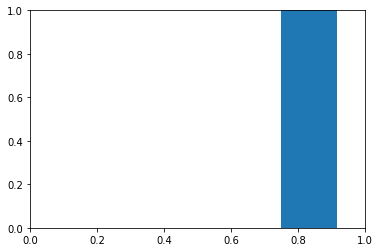

In [11]:
# test scatter plot... Try bar plot maybe?

bar = Light_Acc_Merge.pyplot.bar(x='light_code',y='accident_code', rot=0)
# ax = df.plot.bar(y='speed', rot=0)

sample.pyplot.
plt.legend()
plt.title(f"Light Conditions vs. Accident Severity")ß
plt.xlabel("Light Conditions (1= Daylight, 7=Dark)")
plt.ylabel("Accident Severity (1=Fatal, 2=Severe, 3=Slight)")
plt.savefig('LightVsAccident.png', bbox_inches='tight')